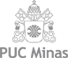
<B>PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS

NÚCLEO DE EDUCAÇÃO A DISTÂNCIA

Pós-graduação Lato Sensu em Ciência de Dados e Big Data

Título: Segmentação de Vendedores do marketplace Olist Store em 2017

Aluno: Alexandre Luís Nunes Cardiga</B>


<B>Nome:</B> 03_00_Reducao_Dimensao.ipynb

<B>Data:</B> 20/03/2022
    
<B>Objetivo:</B>
    
<B>Bibliotecas:</B>  sys,pandas, numpy,matplotlib,BeautifulSoup,bs4,urllib,minhas_funcoes
<a class="anchor" id="etapas"></a>
## Indice

1. [Reescala dos dados](#rescalar)<br>
&emsp;1.1 [MinMaxScaler](#minmax)<br>
&emsp;1.2 [RobustScaler](#robust)<br>
&emsp;1.3 [PowerTransformer](#power)<br>
2. [Redução Dimensões](#reduzdimi)<br>
&emsp;2.1 [PCA](#pca)<br>
&emsp;2.2 [t-SNE](#tsne)<br>
&emsp;2.3 [UMAP](#uma)<br>
3. [Sem Redução](#semr)<br>


<p><b>Localização Projeto: </b> <a href = 'https://github.com/Alexandre-316/Projeto_Ciencia_de_Dados' target = "_blank">Git Hub</a></p>

In [1]:
#!pip install umap-learn

In [2]:
# Apaga todas as variáveis
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
%whos

Interactive namespace is empty.


In [4]:
import sys
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt


import seaborn as sns
#import datetime

from datetime import datetime
from scipy import stats
from scipy.stats    import normaltest, kstest
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from sklearn.preprocessing import MinMaxScaler,RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import umap
import warnings 
if not sys.warnoptions:
    #warnings.filterwarnings('ignore')
    warnings.simplefilter('ignore')

# Define a pasta onde está o arquivo minhas_funcoes.py
sys.path.insert(0, '../Lib')

# Importar minhas_funcoes.py
import minhas_funcoes as mf

import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

caminho = '../Data/'
caminho_temp = '../Template/'

#exibe todas as colunas
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 150)
#pd.set_option('display.max_columns', 999999999)
#pd.set_option('display.max_rows', 999999999)
pd.set_option('display.max_rows', 150)

## <a class="anchor" id="rescalar">1. Reescala dos dados</a>
[Retorna ao Indice](#etapas)

In [5]:
df_abt_orig = pd.read_excel(caminho_temp+'01_Coleta_Processamento_df_Analytic_Base_Table.xlsx')
df_abt = pd.read_excel(caminho_temp+'02_Coleta_Processamento_df_abt_sem_correlacao.xlsx')

In [6]:
df_abt.shape

(1658, 23)

In [7]:
df_abt_orig.shape

(1658, 114)

In [8]:
df_abt_= df_abt.select_dtypes(include=["int64", "float64"])

In [9]:
df_abt_rfm=df_abt_orig[['qtd_pedidos_pontos','preco_pontos','review_score_pontos','tempo_postagem_compra_pontos']]

<AxesSubplot:>

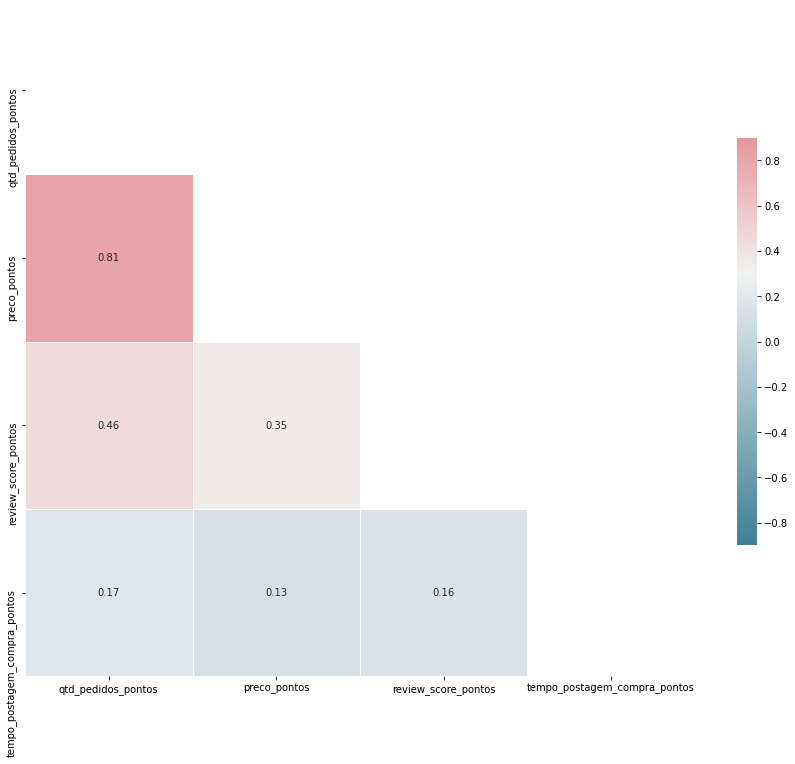

In [10]:
####
v_max=0.9
v_min=-0.9
v_centre=0.3
final_data_spearman=round(df_abt_rfm.corr(method='spearman'),2)
mask = np.triu(np.ones_like(final_data_spearman, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(final_data_spearman, mask=mask, cmap=cmap, vmax=v_max,vmin=v_min, center=v_centre,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


In [11]:
mf.vif_calculo(df_abt_rfm).sort_values(by='VIF', ascending=False)

features        VIF
0            qtd_pedidos_pontos  17.113807
1                  preco_pontos  16.548803
2           review_score_pontos  10.886140
3  tempo_postagem_compra_pontos   6.195545

In [12]:
#Quando foi feito feature engineering, foram criadas as features 'qtd_pedidos_pontos','preco_pontos','review_score_pontos',
#vendedor pontuacao e vendedor_score para serem utilizados em uma nova base de dados.
#Mas, como verificado acima isto não será possível pela multicolinearidade(>5) entre as features, portanto está cancelado.


In [13]:
display(df_abt_.std().sort_values(ascending=False),df_abt_.mean().sort_values(ascending=False))

produto_peso_g_mediana                         4247.726256
habit_km2_mediana                              2250.930774
Area(km2)_mediana                              1071.218947
lucro                                          1031.994389
distancia_cliente_vendedor_mediana              431.798770
vlr_medio_pedido                                170.428507
dias_entre_pedidos                               15.851728
qtd_mes_12                                       10.605566
produto_categoria_id_moda                         9.896040
qtd_mes_06                                        6.487368
entrega_estimado_dias_atraso_mediana              4.610464
qtd_mes_04                                        4.536388
postagem_limiteparceiro_variacao_mediana          4.287445
qtd_mes_02                                        3.351031
postagem_limiteparceiro_dias_atraso_mediana       2.733117
PIB_percapita_(3285,11000]                        2.634936
qtd_mes_01                                        2.1259

produto_peso_g_mediana                         2328.396261
habit_km2_mediana                              2138.170528
Area(km2)_mediana                               939.239646
distancia_cliente_vendedor_mediana              550.969478
vlr_medio_pedido                                175.592153
lucro                                           115.332636
produto_categoria_id_moda                        16.161641
dias_entre_pedidos                               12.820265
qtd_mes_12                                        3.246683
qtd_mes_06                                        1.857660
qtd_mes_04                                        1.349819
qtd_mes_02                                        0.977081
PIB_percapita_(3285,11000]                        0.771411
qtd_mes_01                                        0.441496
postagem_limiteparceiro_dias_atraso_mediana       0.419180
entrega_estimado_dias_atraso_mediana              0.412545
postagem_limiteparceiro_variacao_mediana         -3.5560

In [14]:
df_abt_.columns

Index(['distancia_cliente_vendedor_mediana', 'produto_peso_g_mediana',
       'produto_categoria_id_moda', 'Area(km2)_mediana', 'habit_km2_mediana',
       'postagem_limiteparceiro_variacao_mediana',
       'postagem_limiteparceiro_dias_atraso_mediana',
       'entrega_estimado_dias_atraso_mediana', 'PIB_percapita_(3285,11000]',
       'qtd_mes_01', 'qtd_mes_02', 'qtd_mes_04', 'qtd_mes_06', 'qtd_mes_12',
       'lucro', 'dias_entre_pedidos', 'vlr_medio_pedido'],
      dtype='object')

## <a class="anchor" id="minmax">1.1 MinMaxScaler</a>

(1658, 17)


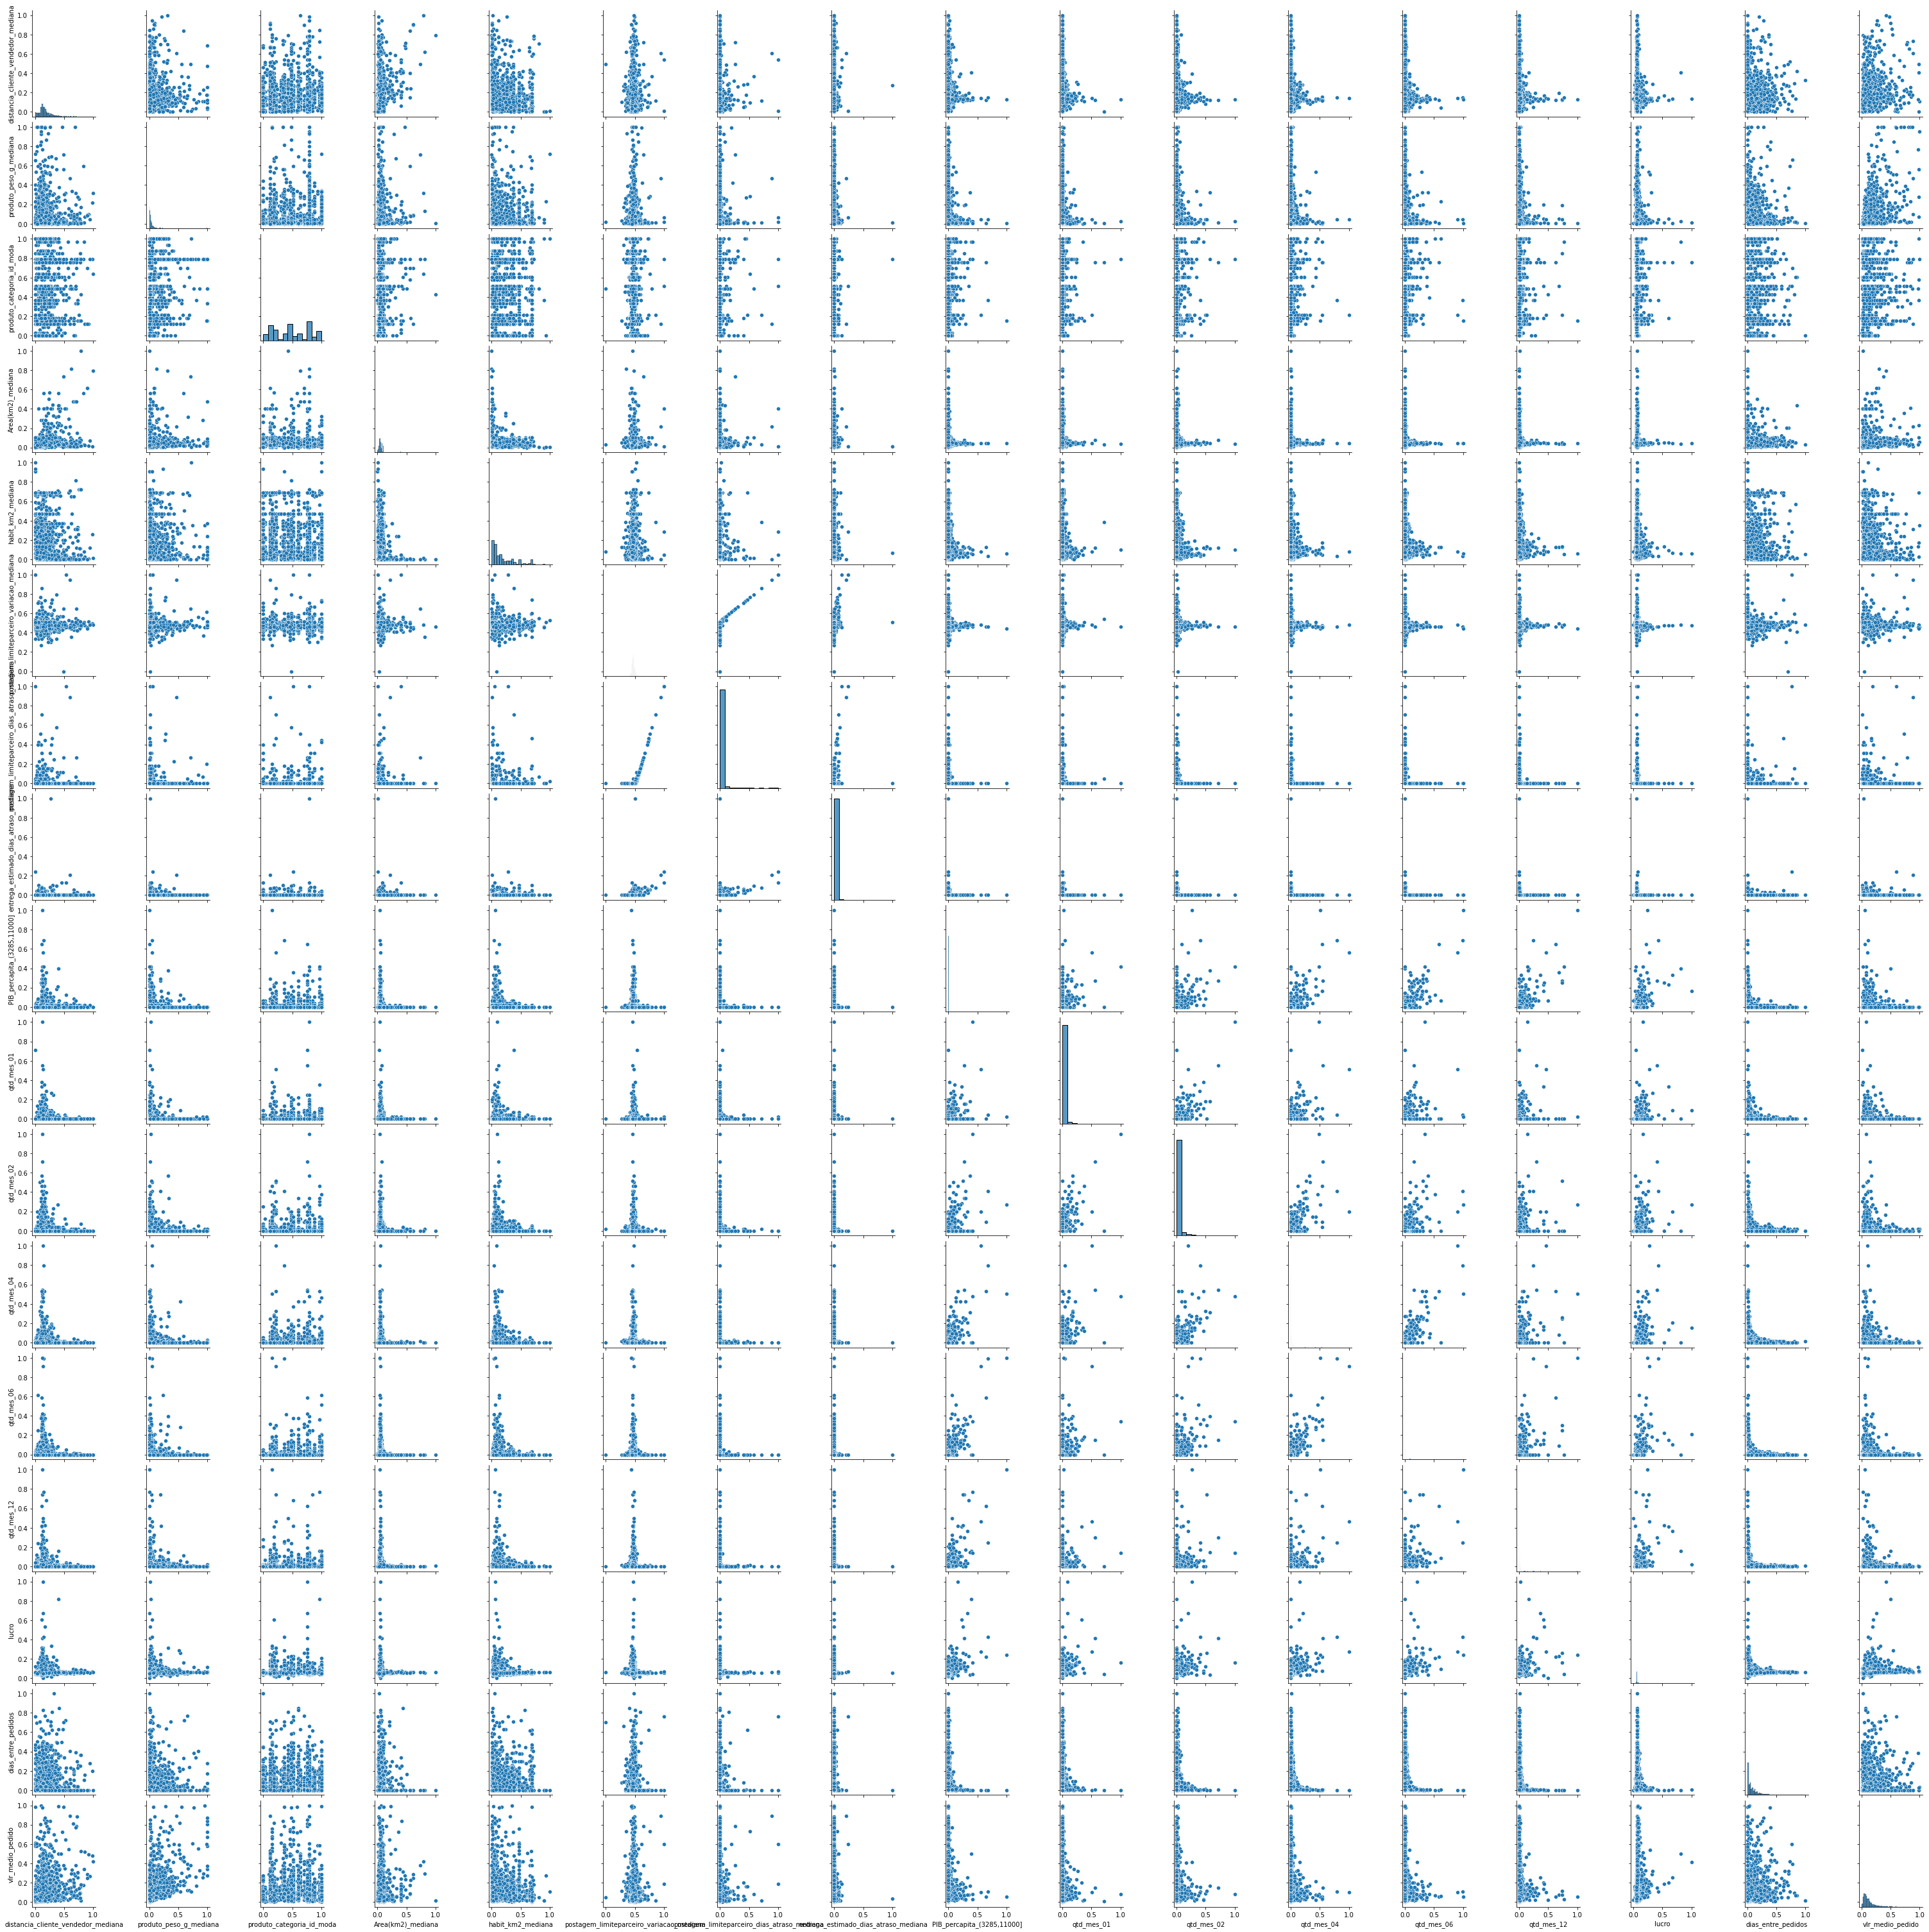

In [15]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_abt_)
df_minmax = pd.DataFrame(scaled, columns=df_abt_.columns)
print(df_minmax.shape)
sns.pairplot(df_minmax)

In [16]:
#Comparando depois de aplicar MinMaxScaler e analisando pelo desvio padrão, 6 features c/ valores mais altos como verificado,
#
#1)produto_peso_g_mediana                         4247.726256
#2)habit_km2_mediana                              2250.930774
#3)Area(km2)_mediana                              1071.218947
#4)lucro                                          1031.994389
#5)distancia_cliente_vendedor_mediana              431.798770
#6)vlr_medio_pedido                                170.428507
#passaram a:
#1)produto_categoria_id_moda                      0.299880
#2)habit_km2_mediana                              0.196088
#3)distancia_cliente_vendedor_mediana             0.143187
#4)produto_peso_g_mediana                         0.141827
#5)vlr_medio_pedido                               0.141109
#6)dias_entre_pedidos                             0.124817
#7)Area(km2)_mediana                              0.074367
#Condensados próximos da média

In [17]:
display(df_minmax.std().sort_values(ascending=False),df_minmax.mean().sort_values(ascending=False))

produto_categoria_id_moda                      0.299880
habit_km2_mediana                              0.196088
distancia_cliente_vendedor_mediana             0.143187
produto_peso_g_mediana                         0.141827
vlr_medio_pedido                               0.141109
dias_entre_pedidos                             0.124817
Area(km2)_mediana                              0.074367
qtd_mes_06                                     0.065529
qtd_mes_04                                     0.062142
qtd_mes_12                                     0.060952
postagem_limiteparceiro_dias_atraso_mediana    0.060736
qtd_mes_02                                     0.059840
PIB_percapita_(3285,11000]                     0.054894
lucro                                          0.050477
qtd_mes_01                                     0.047243
postagem_limiteparceiro_variacao_mediana       0.046102
entrega_estimado_dias_atraso_mediana           0.027608
dtype: float64

produto_categoria_id_moda                      0.489747
postagem_limiteparceiro_variacao_mediana       0.477891
habit_km2_mediana                              0.186196
distancia_cliente_vendedor_mediana             0.182355
vlr_medio_pedido                               0.135755
dias_entre_pedidos                             0.093073
produto_peso_g_mediana                         0.076073
lucro                                          0.071006
Area(km2)_mediana                              0.064140
qtd_mes_06                                     0.018764
qtd_mes_12                                     0.018659
qtd_mes_04                                     0.018491
qtd_mes_02                                     0.017448
PIB_percapita_(3285,11000]                     0.016071
qtd_mes_01                                     0.009811
postagem_limiteparceiro_dias_atraso_mediana    0.009315
entrega_estimado_dias_atraso_mediana           0.002470
dtype: float64

## <a class="anchor" id="robust">1.2 RobustScaler</a>

(1658, 17)


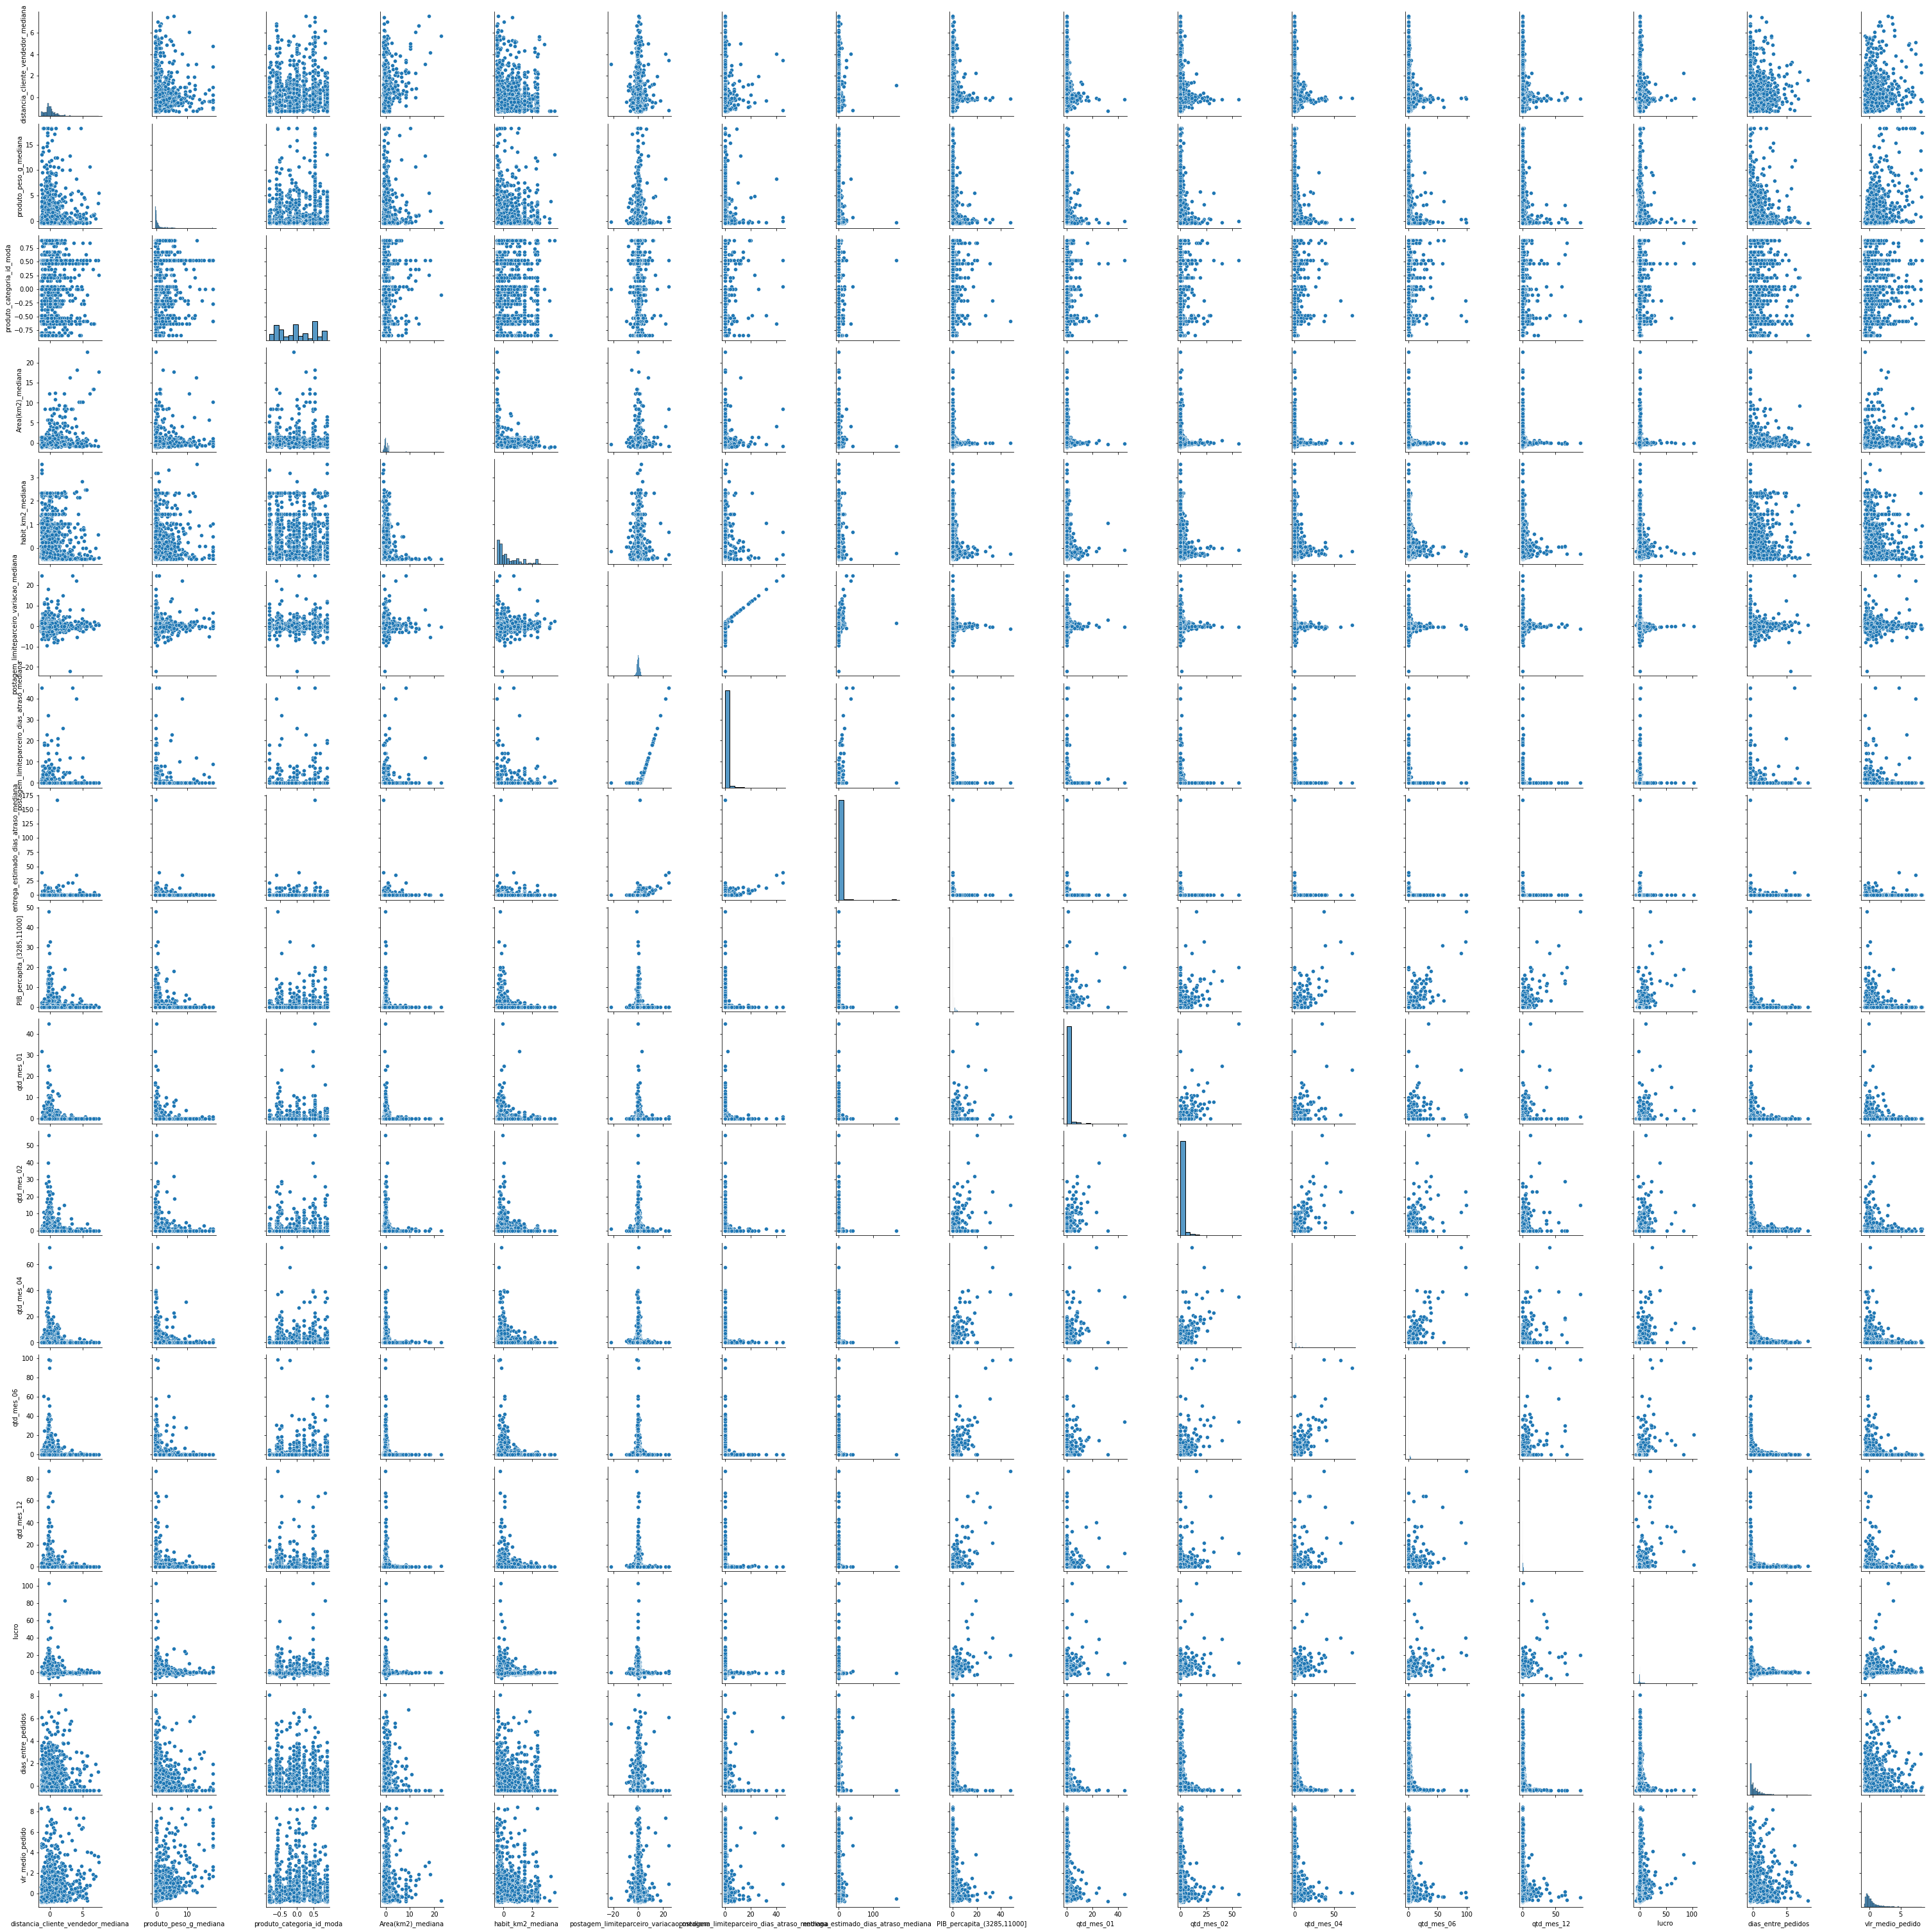

In [18]:
rscaler = RobustScaler() 
scaled_robust = rscaler.fit_transform(df_abt_)
df_robust = pd.DataFrame(scaled_robust, columns = df_abt_.columns)
print(df_robust.shape)
sns.pairplot(df_robust)


In [19]:
display(df_robust.std().sort_values(ascending=False),df_robust.mean().sort_values(ascending=False))

qtd_mes_06                                     6.487368
lucro                                          5.550595
qtd_mes_12                                     5.302783
entrega_estimado_dias_atraso_mediana           4.610464
qtd_mes_04                                     4.536388
qtd_mes_02                                     3.351031
postagem_limiteparceiro_dias_atraso_mediana    2.733117
produto_peso_g_mediana                         2.648621
PIB_percapita_(3285,11000]                     2.634936
postagem_limiteparceiro_variacao_mediana       2.143723
qtd_mes_01                                     2.125913
Area(km2)_mediana                              1.777287
vlr_medio_pedido                               1.311342
distancia_cliente_vendedor_mediana             1.262154
dias_entre_pedidos                             1.056782
habit_km2_mediana                              0.787812
produto_categoria_id_moda                      0.520844
dtype: float64

qtd_mes_06                                     1.857660
qtd_mes_12                                     1.623341
qtd_mes_04                                     1.349819
lucro                                          1.212681
qtd_mes_02                                     0.977081
produto_peso_g_mediana                         0.953014
PIB_percapita_(3285,11000]                     0.771411
qtd_mes_01                                     0.441496
postagem_limiteparceiro_dias_atraso_mediana    0.419180
entrega_estimado_dias_atraso_mediana           0.412545
vlr_medio_pedido                               0.405164
dias_entre_pedidos                             0.388018
Area(km2)_mediana                              0.385031
distancia_cliente_vendedor_mediana             0.300540
habit_km2_mediana                              0.290590
postagem_limiteparceiro_variacao_mediana       0.221954
produto_categoria_id_moda                      0.008507
dtype: float64

## <a class="anchor" id="power">1.3 PowerTransformer</a>

(1658, 17)


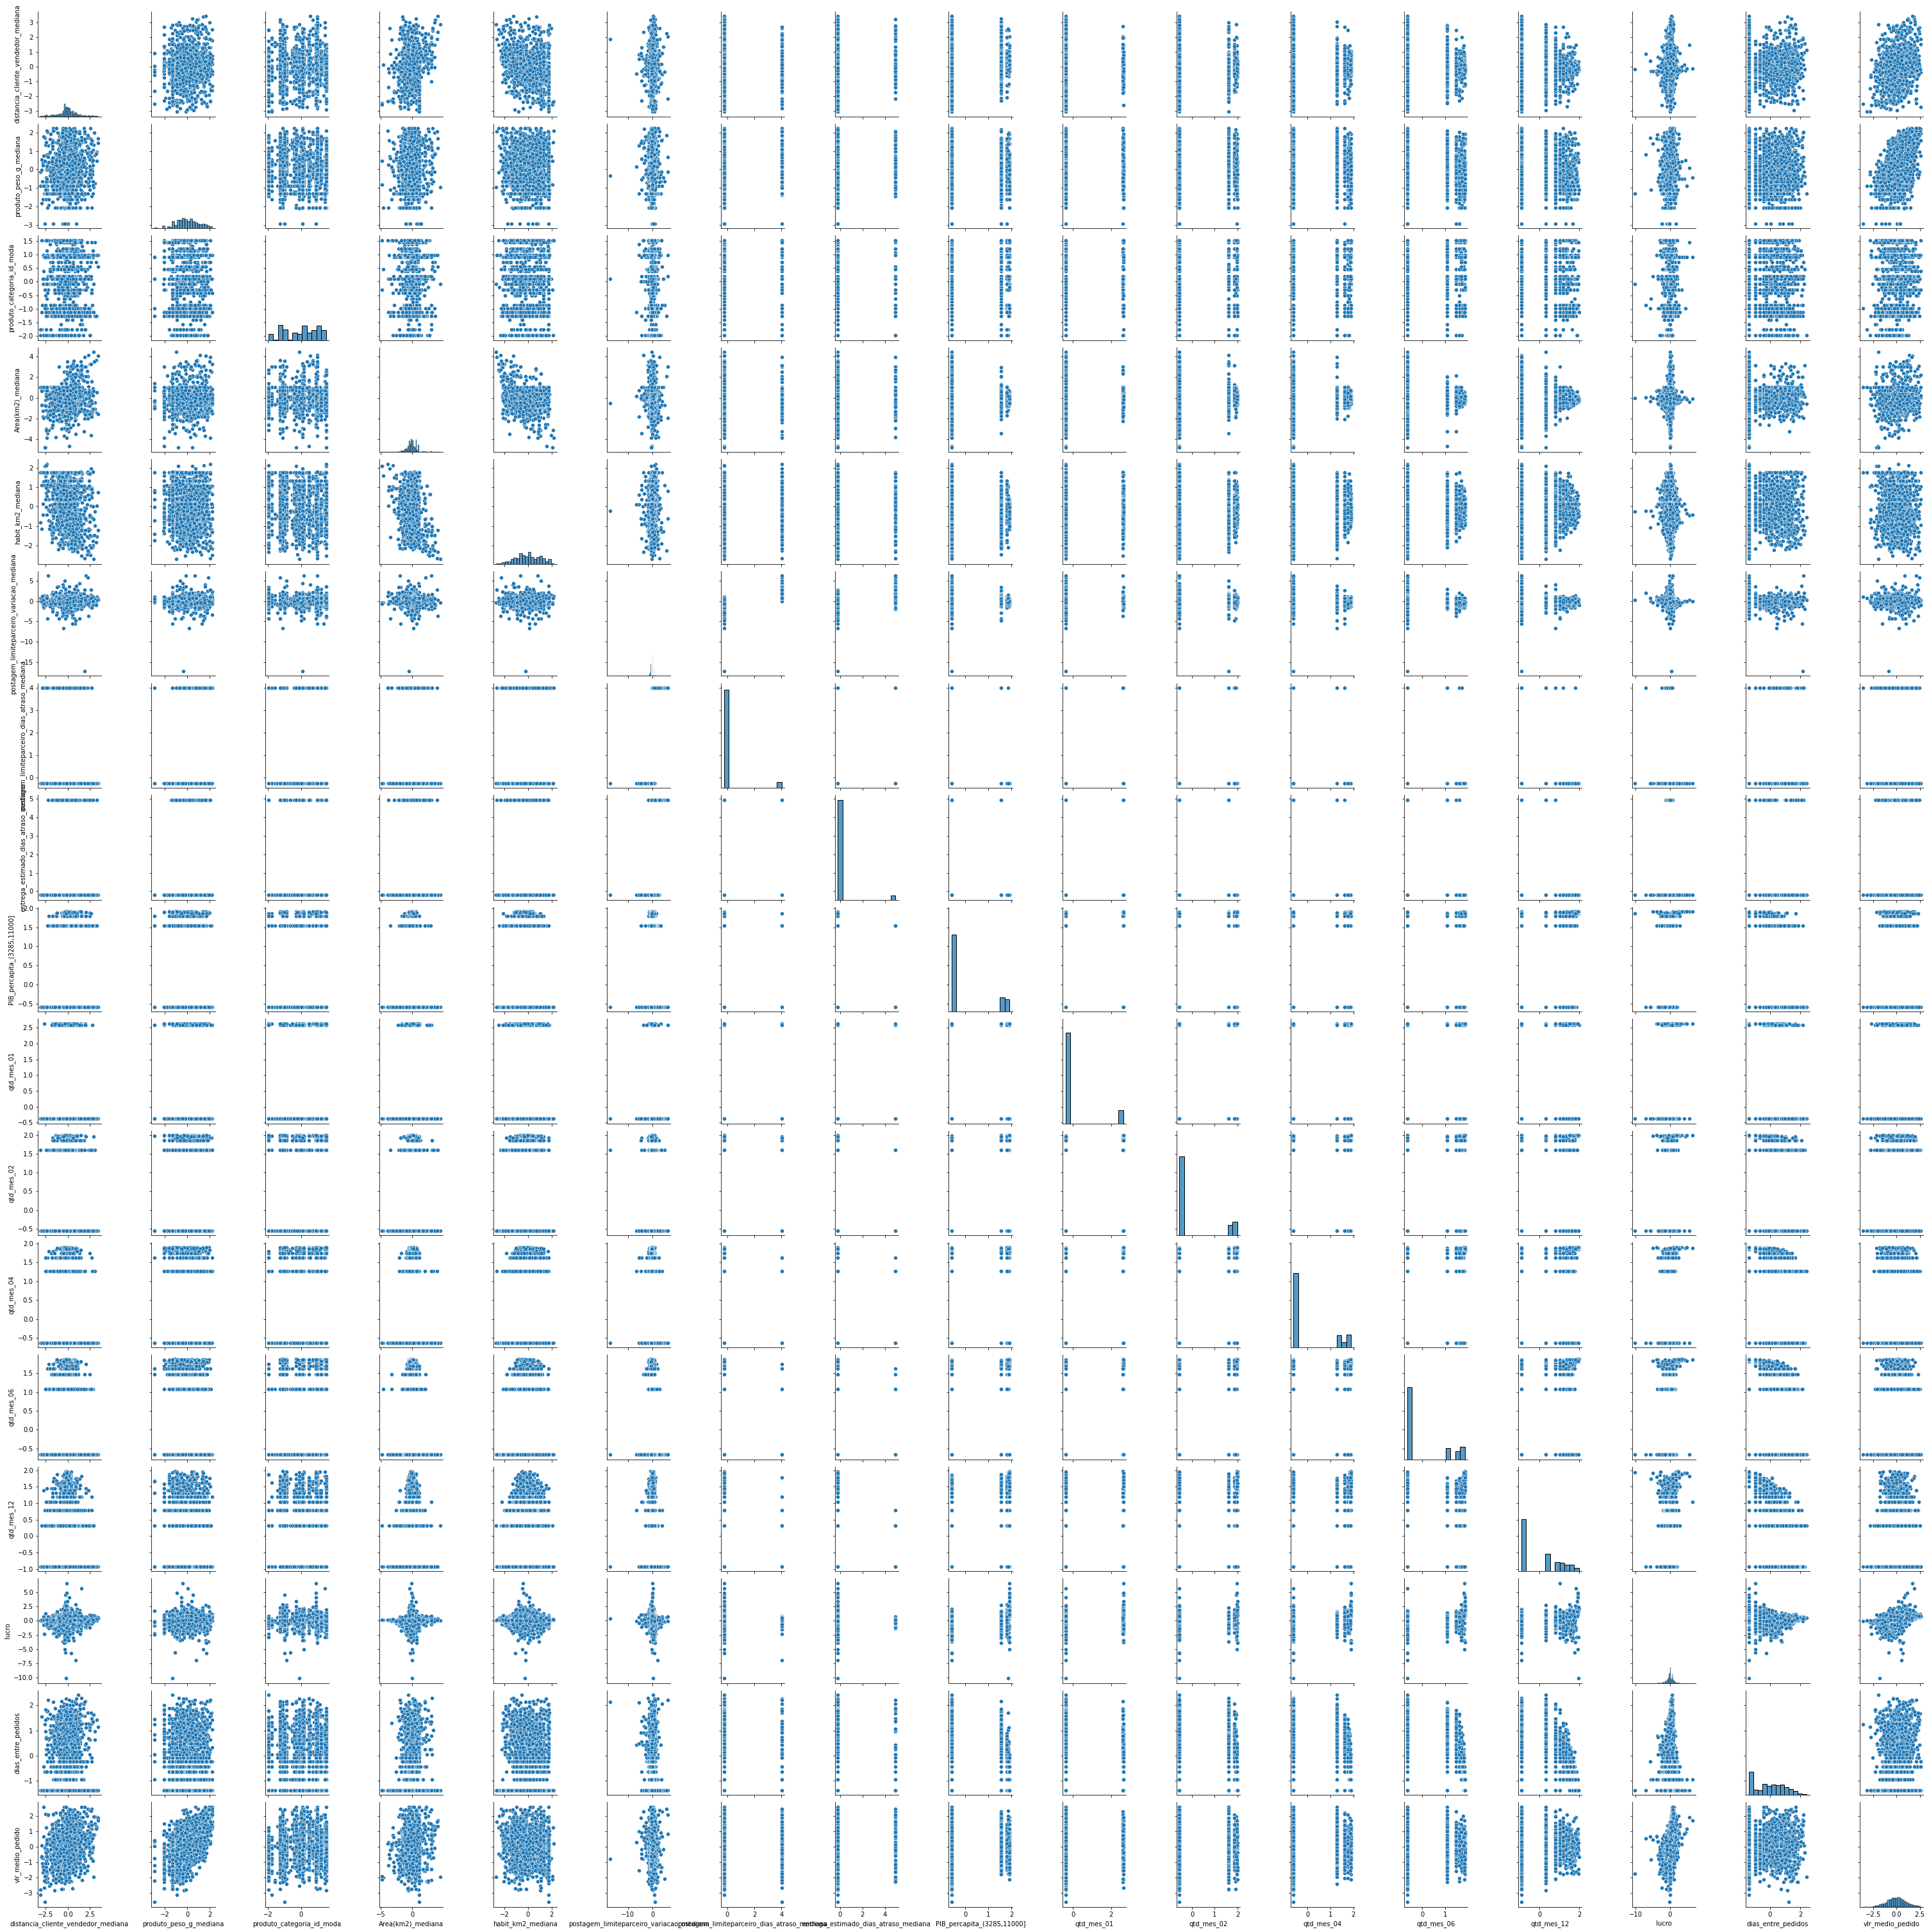

In [20]:
ptscaler = PowerTransformer(method='yeo-johnson') 
scaled_pt = ptscaler.fit_transform(df_abt_)
df_power = pd.DataFrame(scaled_pt, columns = df_abt_.columns)
print(df_power.shape)
sns.pairplot(df_power)

In [21]:
display(df_power.std().sort_values(ascending=False),df_power.mean().sort_values(ascending=False))

PIB_percapita_(3285,11000]                     1.000302
postagem_limiteparceiro_dias_atraso_mediana    1.000302
qtd_mes_01                                     1.000302
qtd_mes_06                                     1.000302
Area(km2)_mediana                              1.000302
dias_entre_pedidos                             1.000302
habit_km2_mediana                              1.000302
lucro                                          1.000302
distancia_cliente_vendedor_mediana             1.000302
vlr_medio_pedido                               1.000302
postagem_limiteparceiro_variacao_mediana       1.000302
produto_peso_g_mediana                         1.000302
produto_categoria_id_moda                      1.000302
qtd_mes_12                                     1.000302
qtd_mes_04                                     1.000302
qtd_mes_02                                     1.000302
entrega_estimado_dias_atraso_mediana           1.000302
dtype: float64

vlr_medio_pedido                               1.145981e-15
Area(km2)_mediana                              9.710099e-16
produto_peso_g_mediana                         7.633620e-16
postagem_limiteparceiro_dias_atraso_mediana    4.725144e-16
qtd_mes_04                                     2.678463e-16
qtd_mes_01                                     2.284729e-16
qtd_mes_12                                     2.251248e-16
dias_entre_pedidos                             2.016883e-16
qtd_mes_06                                     8.571082e-17
habit_km2_mediana                              5.561159e-17
postagem_limiteparceiro_variacao_mediana       2.865956e-17
lucro                                         -5.196219e-17
PIB_percapita_(3285,11000]                    -9.227306e-17
distancia_cliente_vendedor_mediana            -2.835153e-16
produto_categoria_id_moda                     -2.845867e-16
qtd_mes_02                                    -4.632402e-16
entrega_estimado_dias_atraso_mediana    

## <a class="anchor" id="reduzdimi">2. Reduções das Dimensões</a>
[Retorna ao Indice](#etapas)

## <a class="anchor" id="pca">2.1. PCA</a>

In [22]:
df_minmax.shape, df_robust.shape,df_power.shape

((1658, 17), (1658, 17), (1658, 17))

## MinMaxScaler

In [23]:
pca = PCA()
pca.fit_transform(df_minmax)
explained_variance = pca.explained_variance_ratio_
cumsum = np.cumsum(explained_variance)
cumsum.shape, df_abt_.shape

((17,), (1658, 17))

<Figure size 432x288 with 0 Axes>

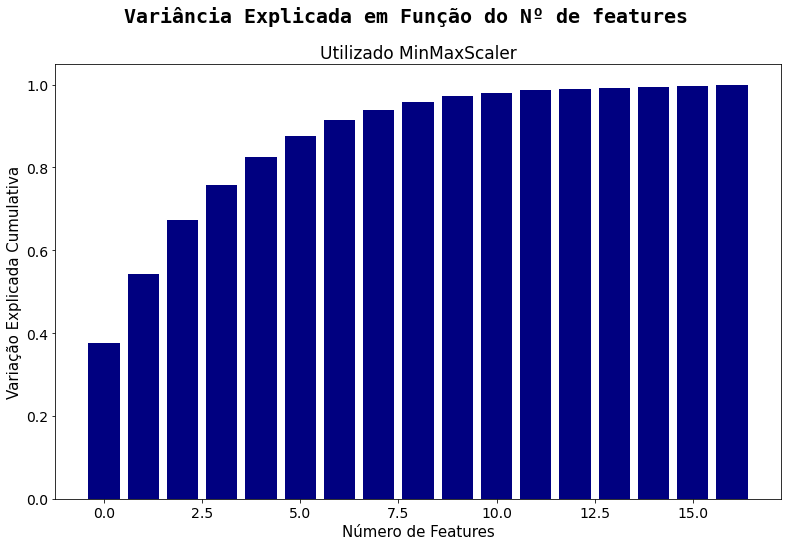

In [24]:
plt.figure()
fig = plt.figure(figsize=(13, 8))

ax = fig.add_subplot(111)
ax.set_xlabel('Número de Features', fontsize=15)
ax.set_ylabel('Variação Explicada Cumulativa', fontsize=15)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
#ax.set_title('Variance expliquée en fonction de nombre de CP', fontsize=20)

plt.bar(range(df_minmax.shape[1]), cumsum, color='navy')
plt.suptitle("Variância Explicada em Função do Nº de features", fontsize = 20, fontname = 'monospace', weight = 'bold')
ax.set_title('Utilizado MinMaxScaler', fontsize=17)
plt.show()

In [25]:
#com 10 features
pca_final = PCA(n_components=10)
a = pca_final.fit_transform(df_minmax)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)

0.972040344977541

In [26]:
#com 9 features
pca_final = PCA(n_components=9)
df_m = pca_final.fit_transform(df_minmax)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)

0.9578033955612554

In [27]:
#com 8 features
pca_final = PCA(n_components=9)
a = pca_final.fit_transform(df_minmax)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)

0.9578033955612554

In [28]:
cabecalho = []
for i in range(1, 10):
    elt = 'PCA' + str(i)
    cabecalho.append(elt)

In [29]:
#Selecionado 9 features
pca_ = PCA(n_components=9)
pca_minmax = pca_.fit_transform(df_minmax)
df_minmax_PCA_9_features = pd.DataFrame(data=pca_minmax, columns=cabecalho, index=df_abt_.index)
#gerado dataframe com transformação MinMaxScaler e redução de features com PCA(9 features com 95.78% de variância acumulada)
df_minmax_PCA_9_features
df_minmax_PCA_9_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_PCA_9_features.xlsx', index=True)

## RobustScaler

In [30]:
pca = PCA()
pca.fit_transform(df_robust)
explained_variance = pca.explained_variance_ratio_
cumsum = np.cumsum(explained_variance)
cumsum.shape, df_abt_.shape

((17,), (1658, 17))

<Figure size 432x288 with 0 Axes>

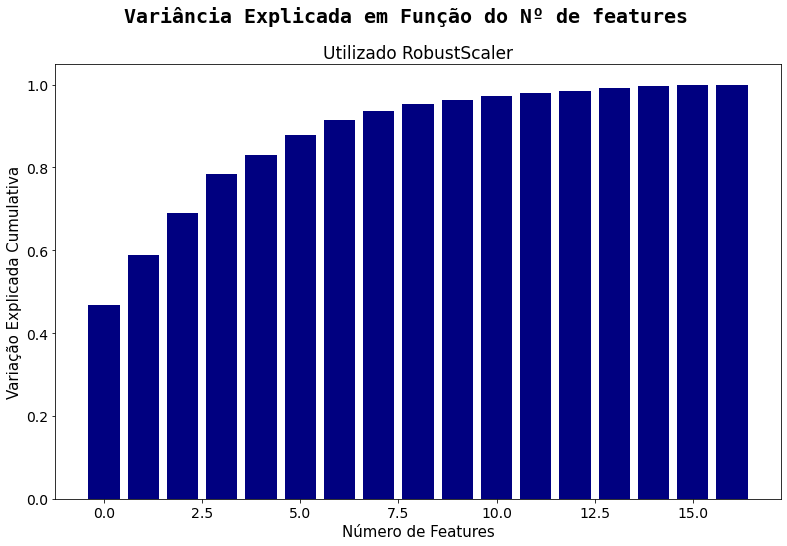

In [31]:
plt.figure()
fig = plt.figure(figsize=(13, 8))

ax = fig.add_subplot(111)
ax.set_xlabel('Número de Features', fontsize=15)
ax.set_ylabel('Variação Explicada Cumulativa', fontsize=15)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
#ax.set_title('Variance expliquée en fonction de nombre de CP', fontsize=20)

plt.bar(range(df_robust.shape[1]), cumsum, color='navy')
plt.suptitle("Variância Explicada em Função do Nº de features", fontsize = 20, fontname = 'monospace', weight = 'bold')
ax.set_title('Utilizado RobustScaler', fontsize=17)
plt.show()

In [32]:
#com 11 features
pca_final = PCA(n_components=11)
a = pca_final.fit_transform(df_robust)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)

0.9717350723976291

In [33]:
#com 10 features
pca_final = PCA(n_components=10)
a = pca_final.fit_transform(df_robust)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)

0.9628879234944283

In [34]:
#com 9 features
pca_final = PCA(n_components=9)
a = pca_final.fit_transform(df_robust)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)#com 9 features


0.9526306477337015

In [35]:
#Selecionado 9 features
pca_ = PCA(n_components=9)
pca_robust = pca_.fit_transform(df_robust)
df_robust_PCA_9_features = pd.DataFrame(data=pca_robust, columns=cabecalho, index=df_abt_.index)
#gerado dataframe com transformação MinMaxScaler e redução de features com PCA(9 features com 95.26% de variância acumulada)
df_robust_PCA_9_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_PCA_9_features.xlsx', index=True)

### PowerTransformer

In [36]:
pca = PCA()
pca.fit_transform(df_power)
explained_variance = pca.explained_variance_ratio_
cumsum = np.cumsum(explained_variance)
cumsum.shape, df_abt_.shape

((17,), (1658, 17))

<Figure size 432x288 with 0 Axes>

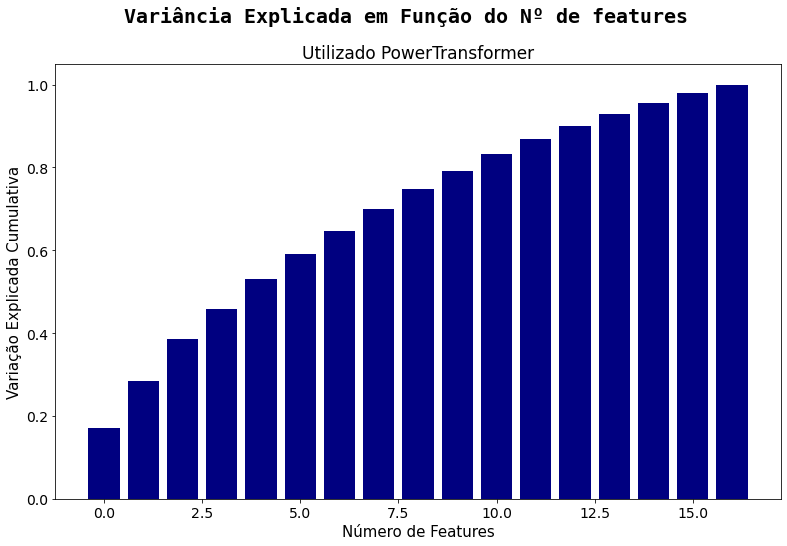

In [37]:
plt.figure()
fig = plt.figure(figsize=(13, 8))

ax = fig.add_subplot(111)
ax.set_xlabel('Número de Features', fontsize=15)
ax.set_ylabel('Variação Explicada Cumulativa', fontsize=15)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
#ax.set_title('Variance expliquée en fonction de nombre de CP', fontsize=20)

plt.bar(range(df_power.shape[1]), cumsum, color='navy')
plt.suptitle("Variância Explicada em Função do Nº de features", fontsize = 20, fontname = 'monospace', weight = 'bold')
ax.set_title('Utilizado PowerTransformer', fontsize=17)
plt.show()

In [38]:
#com 15 features
pca_final = PCA(n_components=15)
a = pca_final.fit_transform(df_power)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)

0.9565067150757891

In [39]:
#com 14 features
pca_final = PCA(n_components=14)
a = pca_final.fit_transform(df_power)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)

0.9297552856129647

In [40]:
#com 13 features
pca_final = PCA(n_components=13)
a = pca_final.fit_transform(df_power)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)

0.9001505618701928

In [41]:
#com 9 features
pca_final = PCA(n_components=9)
a = pca_final.fit_transform(df_robust)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)#com 9 features


0.9526306477337022

In [42]:
cabecalho = []
for i in range(1, 16):
    elt = 'PCA' + str(i)
    cabecalho.append(elt)

In [43]:
#Selecionado 15 features
pca_ = PCA(n_components=15)
pca_power = pca_.fit_transform(df_power)
df_power_PCA_15_features = pd.DataFrame(data=pca_power, columns=cabecalho, index=df_abt_.index)
#gerado dataframe com transformação MinMaxScaler e redução de features com PCA(9 features com 95.65% de variância acumulada)
df_power_PCA_15_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_PCA_15_features.xlsx', index=True)

## <a class="anchor" id="tsne">2.2. t-SNE</a>

In [44]:
"""
O algoritmo t-Distributed Stochastic Neighbor Embedding (t-SNE) reduz a dimensionalidade ao tentar manter instâncias 
semelhantes próximas, ao mesmo tempo em que instâncias diferentes são separadas. É usado principalmente para visualização, 
em particular para exibir clusters de instâncias em espaço de alta dimensão.

"""

'\nO algoritmo t-Distributed Stochastic Neighbor Embedding (t-SNE) reduz a dimensionalidade ao tentar manter instâncias \nsemelhantes próximas, ao mesmo tempo em que instâncias diferentes são separadas. É usado principalmente para visualização, \nem particular para exibir clusters de instâncias em espaço de alta dimensão.\n\n'

## MinMaxScaler

In [45]:
cabecalho = []
for i in range(1, 3):
    elt = 'TSNE' + str(i)
    cabecalho.append(elt)


In [46]:
tsne = TSNE(n_components=2,perplexity=50,n_iter=1000,verbose=1,random_state=43,learning_rate=250)
tsne_final = tsne.fit_transform(df_minmax)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1658 samples in 0.000s...
[t-SNE] Computed neighbors for 1658 samples in 0.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1658
[t-SNE] Computed conditional probabilities for sample 1658 / 1658
[t-SNE] Mean sigma: 0.105589
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.959312
[t-SNE] KL divergence after 1000 iterations: 0.948771


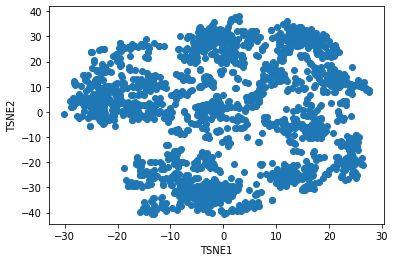

In [47]:
plt.scatter(tsne_final[:, 0], tsne_final[:, 1])
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()

In [48]:
df_minmax_TSNE_2_features = pd.DataFrame(data=tsne_final, columns=cabecalho, index=df_abt_.index)
df_minmax_TSNE_2_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_TSNE_2_features.xlsx', index=True)

## RobustScaler

In [49]:
tsne = TSNE(n_components=2,perplexity=50,n_iter=1000,verbose=1,random_state=43,learning_rate=250)
tsne_final = tsne.fit_transform(df_robust)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1658 samples in 0.000s...
[t-SNE] Computed neighbors for 1658 samples in 0.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1658
[t-SNE] Computed conditional probabilities for sample 1658 / 1658
[t-SNE] Mean sigma: 1.307665
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.941338
[t-SNE] KL divergence after 1000 iterations: 1.127810


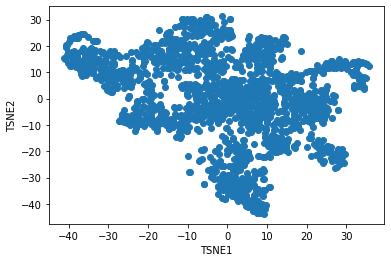

In [50]:
plt.scatter(tsne_final[:, 0], tsne_final[:, 1])
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()

In [51]:
df_robust_TSNE_2_features = pd.DataFrame(data=tsne_final, columns=cabecalho, index=df_abt_.index)
df_robust_TSNE_2_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_TSNE_2_features.xlsx', index=True)

## PowerTransformer

In [52]:
tsne = TSNE(n_components=2,perplexity=50,n_iter=1000,verbose=1,random_state=43,learning_rate=250)
tsne_final = tsne.fit_transform(df_power)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1658 samples in 0.000s...
[t-SNE] Computed neighbors for 1658 samples in 0.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1658
[t-SNE] Computed conditional probabilities for sample 1658 / 1658
[t-SNE] Mean sigma: 1.418188
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.246429
[t-SNE] KL divergence after 1000 iterations: 1.185021


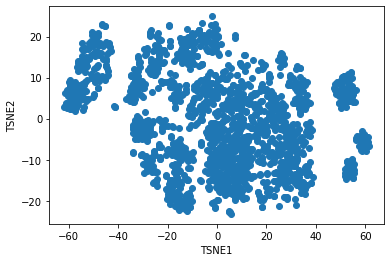

In [53]:
plt.scatter(tsne_final[:, 0], tsne_final[:, 1])
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()

In [54]:
df_power_TSNE_2_features = pd.DataFrame(data=tsne_final, columns=cabecalho, index=df_abt_.index)
df_power_TSNE_2_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_TSNE_2_features.xlsx', index=True)

## <a class="anchor" id="uma">2.3. UMAP</a>

## MinMaxScaler

In [55]:
cabecalho = []
for i in range(1, 3):
    elt = 'TUMAP' + str(i)
    cabecalho.append(elt)

tumap = umap.UMAP(n_neighbors=50)
tumap_final = tumap.fit_transform(df_minmax)

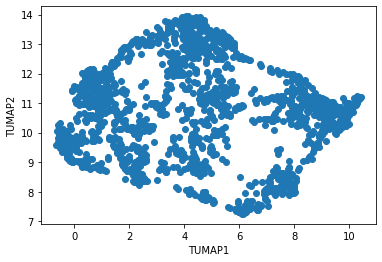

In [56]:
plt.scatter(tumap_final[:, 0], tumap_final[:, 1])
plt.xlabel("TUMAP1")
plt.ylabel("TUMAP2")
plt.show()

In [57]:
df_minmax_TUMAP_2_features = pd.DataFrame(data=tumap_final, columns=cabecalho, index=df_abt_.index)
df_minmax_TUMAP_2_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_UMAP_2_features.xlsx', index=True)

## RobustScaler

In [58]:
tumap = umap.UMAP(n_neighbors=50)
tumap_final = tumap.fit_transform(df_robust)

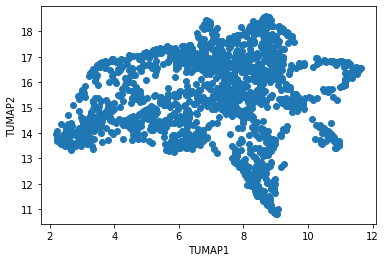

In [59]:
plt.scatter(tumap_final[:, 0], tumap_final[:, 1])
plt.xlabel("TUMAP1")
plt.ylabel("TUMAP2")
plt.show()

In [60]:
df_robust_TUMAP_2_features = pd.DataFrame(data=tumap_final, columns=cabecalho, index=df_abt_.index)
df_robust_TUMAP_2_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_UMAP_2_features.xlsx', index=True)

## PowerTransformer

In [61]:
tumap = umap.UMAP(n_neighbors=50)
tumap_final = tumap.fit_transform(df_power)

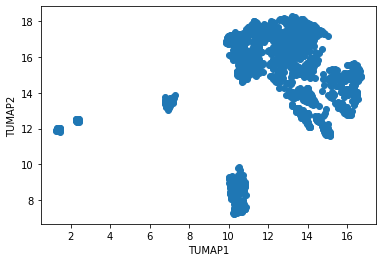

In [62]:
plt.scatter(tumap_final[:, 0], tumap_final[:, 1])
plt.xlabel("TUMAP1")
plt.ylabel("TUMAP2")
plt.show()

In [63]:
df_power_TUMAP_2_features = pd.DataFrame(data=tumap_final, columns=cabecalho, index=df_abt_.index)
df_power_TUMAP_2_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_UMAP_2_features.xlsx', index=True)

## <a class="anchor" id="semr">3. Sem Redução</a>
[Retorna ao Indice](#etapas)

In [64]:
df_minmax.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_SemReducao_17_features.xlsx', index=True)
df_robust.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_SemReducao_17_features.xlsx', index=True)
df_power.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_SemReducao_17_features.xlsx', index=True)